In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import spacy
import re,string,unicodedata
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from textblob import TextBlob
from textblob import Word
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
train=pd.read_csv('/content/drive/My Drive/Task 3 NLP/train_df.csv')  # Reading the data
test=pd.read_csv('/content/drive/My Drive/Task 3 NLP/test_df.csv')

In [4]:
data = pd.concat([train,test],axis=0, ignore_index=True)
data.shape

(50000, 2)

In [5]:
data.head(5)

,review,sentiment
0,Cute idea... salesgirl Linda Smith (Yolande Do...,1
1,The beginning of this movie was good. It start...,0
2,"I watched this movie, and hoped for something ...",0
3,"End Game started well, the least said about th...",0
4,"A very silly movie, this starts with a soft po...",1


In [0]:
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]*\<.?>|!|\'|"|#.|,|)|(]', '', text)

#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text
#Apply function on review column
data['review']= data['review'].apply(denoise_text)

In [0]:
def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text

data['review']=data['review'].apply(remove_special_characters)

In [8]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [9]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
#Bag of words vector with bi-grams
count_vect = CountVectorizer(stop_words=stopwords.words('english'),ngram_range = (1, 2))
count_vect = count_vect.fit(data["review"].values)
bigram_wrds = count_vect.transform(data["review"].values)

TF-IDF:

In [0]:
count_vect_tfidf = TfidfVectorizer(stop_words=stopwords.words('english'),ngram_range = (1, 2))
count_vect_tfidf = count_vect_tfidf.fit(data["review"].values)
tfidf_wrds  = count_vect_tfidf.transform(data["review"].values)

In [12]:
data.head()

,review,sentiment
0,Cute idea salesgirl Linda Smith Yolande Donlan...,1
1,The beginning of this movie was good It starte...,0
2,I watched this movie and hoped for something t...,0
3,End Game started well the least said about the...,0
4,A very silly movie this starts with a soft por...,1


In [13]:
data["review"].values

array(['Cute idea salesgirl Linda Smith Yolande Donlan inherits a teeny tiny little county of Lampidorra That country which wasnt even in North America was made the 49th state of course there were only 48 states at the time since this was made in 1952 Linda travels to the country she has inherited and we follow her along as she tries to figure out what to do with this strange country and its even quirkier people At one point she sings a song that she claims is from her people the Navajo and it gets evermore sillier from there although Yolande Donlans heavy lipstick and omnipresent smile never get ruffled or shmeared There are other songs scattered throughout as the citizens sing to welcome their new princess Filmed in a glorious British version of technicolor or some such equivalent about the only big name here is Dirk Bogarde as British subject Tony Craig cheese vendor Bogarde made a big splash in the UK film industry after serving in the war and was even knighted by QE II Craig and t

In [14]:
bigram_wrds

<50000x3532350 sparse matrix of type '<class 'numpy.int64'>'
	with 10805504 stored elements in Compressed Sparse Row format>

Model Building:

acc is on test data: 88.27333333333334
train accuracy is: 99.90571428571428
              precision    recall  f1-score   support

           0       0.87      0.90      0.88      7458
           1       0.90      0.86      0.88      7542

    accuracy                           0.88     15000
   macro avg       0.88      0.88      0.88     15000
weighted avg       0.88      0.88      0.88     15000



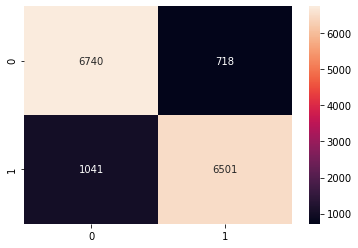

In [15]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 
X = bigram_wrds
Y = data["sentiment"]
x_l, x_test, y_l, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB(alpha = 0.7)
clf.fit(x_l, y_l)
pred = clf.predict(x_test)
acc = accuracy_score(y_test, pred, normalize = True) * float(100)  
print("acc is on test data:", acc)
sns.heatmap(confusion_matrix(y_test, pred), annot = True, fmt = 'd')
train_acc = accuracy_score(y_l, clf.predict(x_l), normalize = True) * float(100)
print("train accuracy is:", train_acc)
print(classification_report(y_test, pred))

Logistic Regression

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


acc is on test data: 89.83333333333333
train accuracy is: 100.0
              precision    recall  f1-score   support

           0       0.90      0.89      0.90      7458
           1       0.90      0.90      0.90      7542

    accuracy                           0.90     15000
   macro avg       0.90      0.90      0.90     15000
weighted avg       0.90      0.90      0.90     15000



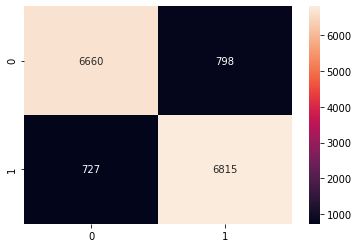

In [16]:
lr=LogisticRegression()
lr.fit(x_l, y_l)
pred1 = lr.predict(x_test)
acc = accuracy_score(y_test, pred1, normalize = True) * float(100)  
print("acc is on test data:", acc)
sns.heatmap(confusion_matrix(y_test, pred1),annot = True, fmt = 'd')
train_acc = accuracy_score(y_l, lr.predict(x_l), normalize = True) * float(100)
print("train accuracy is:", train_acc)
print(classification_report(y_test, pred1))

Cross Checking with the model:

In [0]:
review = ["This is a worst movie","This is a wonderful movie"]

In [0]:
vectorize = CountVectorizer(vocabulary = count_vect.vocabulary_)
#Use classifier we trained using Bag of words
polarity = lr.predict(vectorize.transform(review))

In [19]:
print(polarity)

[0 1]


Running the model with TFIDF:

acc is on test data: 88.78
train accuracy is: 99.36571428571429
              precision    recall  f1-score   support

           0       0.88      0.90      0.89      7458
           1       0.90      0.87      0.89      7542

    accuracy                           0.89     15000
   macro avg       0.89      0.89      0.89     15000
weighted avg       0.89      0.89      0.89     15000



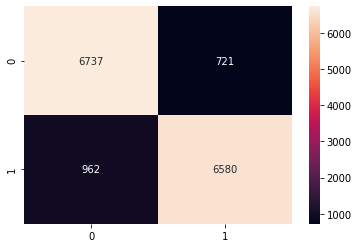

In [20]:
X = tfidf_wrds
Y = data["sentiment"]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB(alpha = 0.7)
clf.fit(x_train, y_train)
pred = clf.predict(x_test)
acc = accuracy_score(y_test, pred, normalize = True) * float(100)  
print("acc is on test data:", acc)
sns.heatmap(confusion_matrix(y_test, pred), annot = True, fmt = 'd')
train_acc = accuracy_score(y_train, clf.predict(x_train), normalize = True) * float(100)
print("train accuracy is:", train_acc)
print(classification_report(y_test, pred))

Logistic Regression

acc is on test data: 88.94
train accuracy is: 96.11142857142858
              precision    recall  f1-score   support

           0       0.90      0.87      0.89      7458
           1       0.88      0.90      0.89      7542

    accuracy                           0.89     15000
   macro avg       0.89      0.89      0.89     15000
weighted avg       0.89      0.89      0.89     15000



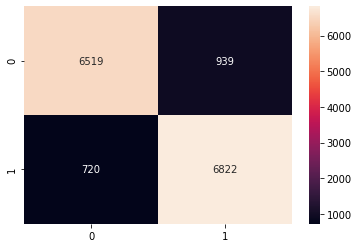

In [21]:
lr=LogisticRegression()
lr.fit(x_train, y_train)
pred1 = lr.predict(x_test)
acc = accuracy_score(y_test, pred1, normalize = True) * float(100)  
print("acc is on test data:", acc)
sns.heatmap(confusion_matrix(y_test, pred1),annot = True, fmt = 'd')
train_acc = accuracy_score(y_train, lr.predict(x_train), normalize = True) * float(100)
print("train accuracy is:", train_acc)
print(classification_report(y_test, pred1))

Random Forest

In [0]:
from sklearn.ensemble import RandomForestClassifier

acc is on test data: 88.94
train accuracy is: 100.0
              precision    recall  f1-score   support

           0       0.90      0.87      0.89      7458
           1       0.88      0.90      0.89      7542

    accuracy                           0.89     15000
   macro avg       0.89      0.89      0.89     15000
weighted avg       0.89      0.89      0.89     15000



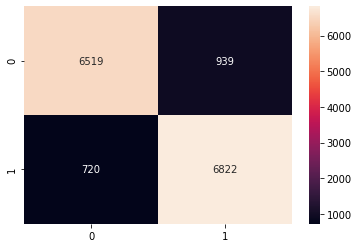

In [23]:
rfc = RandomForestClassifier(n_jobs=-1, max_features='sqrt') 
rfc.fit(x_train, y_train)
pred1 = lr.predict(x_test)
acc = accuracy_score(y_test, pred1, normalize = True) * float(100)  
print("acc is on test data:", acc)
sns.heatmap(confusion_matrix(y_test, pred1),annot = True, fmt = 'd')
train_acc = accuracy_score(y_train, rfc.predict(x_train), normalize = True) * float(100)
print("train accuracy is:", train_acc)
print(classification_report(y_test, pred1))

<function matplotlib.pyplot.show>

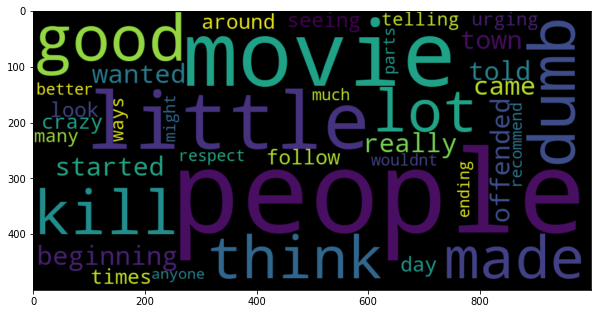

In [24]:
plt.figure(figsize=(10,10))
positive_text=data.review[1]
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
positive_words=WC.generate(positive_text)
plt.imshow(positive_words,interpolation='bilinear')
plt.show

<function matplotlib.pyplot.show>

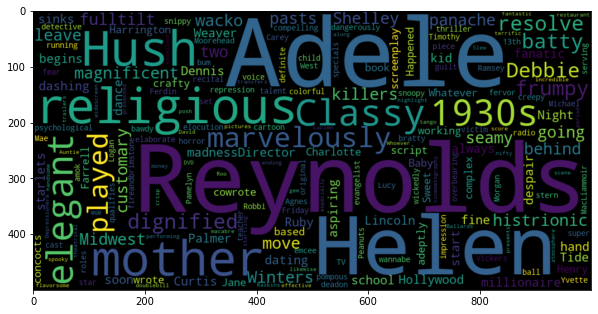

In [25]:
plt.figure(figsize=(10,10))
negative_text=data.review[10]
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
negative_words=WC.generate(negative_text)
plt.imshow(negative_words,interpolation='bilinear')
plt.show

NN

In [0]:
from nltk.corpus import stopwords
from nltk import regexp_tokenize

In [0]:
patn= '\w+'
sw = stopwords.words('english')
reviews = data['review']
def no_sw(sentence):
    sentence_split=regexp_tokenize(sentence.lower(), patn)
    no_sw_sentence=[]
    for word in sentence_split:
        if word not in sw:
            no_sw_sentence.append(word)
    #return ' '.join(np.asarray(no_sw_sentence))
    return no_sw_sentence
no_sw_reviews = reviews.apply(lambda x: no_sw(x))

In [0]:
c = []
for arr in no_sw_reviews:
    c+=arr

In [29]:
c

['cute',
 'idea',
 'salesgirl',
 'linda',
 'smith',
 'yolande',
 'donlan',
 'inherits',
 'teeny',
 'tiny',
 'little',
 'county',
 'lampidorra',
 'country',
 'wasnt',
 'even',
 'north',
 'america',
 'made',
 '49th',
 'state',
 'course',
 '48',
 'states',
 'time',
 'since',
 'made',
 '1952',
 'linda',
 'travels',
 'country',
 'inherited',
 'follow',
 'along',
 'tries',
 'figure',
 'strange',
 'country',
 'even',
 'quirkier',
 'people',
 'one',
 'point',
 'sings',
 'song',
 'claims',
 'people',
 'navajo',
 'gets',
 'evermore',
 'sillier',
 'although',
 'yolande',
 'donlans',
 'heavy',
 'lipstick',
 'omnipresent',
 'smile',
 'never',
 'get',
 'ruffled',
 'shmeared',
 'songs',
 'scattered',
 'throughout',
 'citizens',
 'sing',
 'welcome',
 'new',
 'princess',
 'filmed',
 'glorious',
 'british',
 'version',
 'technicolor',
 'equivalent',
 'big',
 'name',
 'dirk',
 'bogarde',
 'british',
 'subject',
 'tony',
 'craig',
 'cheese',
 'vendor',
 'bogarde',
 'made',
 'big',
 'splash',
 'uk',
 'film

In [30]:
total_freq = nltk.FreqDist(word for word in c)
unwanted_words=['movie', 'film']
for i in unwanted_words:
    total_freq.pop(i)
total_freq

FreqDist({'cute': 1089,
          'idea': 3957,
          'salesgirl': 4,
          'linda': 243,
          'smith': 702,
          'yolande': 5,
          'donlan': 5,
          'inherits': 36,
          'teeny': 25,
          'tiny': 462,
          'little': 12311,
          'county': 124,
          'lampidorra': 2,
          'country': 1716,
          'wasnt': 4484,
          'even': 24281,
          'north': 445,
          'america': 1205,
          'made': 15408,
          '49th': 6,
          'state': 1033,
          'course': 4788,
          '48': 58,
          'states': 644,
          'time': 23268,
          'since': 5570,
          '1952': 55,
          'travels': 248,
          'inherited': 64,
          'follow': 1322,
          'along': 3628,
          'tries': 2414,
          'figure': 1384,
          'strange': 1763,
          'quirkier': 4,
          'people': 17481,
          'one': 50366,
          'point': 5890,
          'sings': 283,
          'song': 1942,
       

In [31]:
print(len(total_freq))

221696


In [32]:
total_words = [list(wds) for wds in zip(*total_freq)][0]
most_common = [list(wds) for wds in zip(*total_freq.most_common(2000))][0]
print(len(most_common), len(total_words))

2000 221696


In [0]:
total_words

https://www.geeksforgeeks.org/zip-in-python/

For ZIP doubt:
https://stackoverflow.com/questions/29139350/difference-between-ziplist-and-ziplist

In [0]:
def join_review(review):
    return ' '.join(review)
joined_wo_sw = no_sw_reviews.apply(lambda x: join_review(x))   # joining the tokenized words

In [35]:
joined_wo_sw

0        cute idea salesgirl linda smith yolande donlan...
1        beginning movie good started get really dumb t...
2        watched movie hoped something get better entir...
3        end game started well least said end better se...
4        silly movie starts soft porn sequence ventures...
                               ...                        
49995    ive watched movie actually several times want ...
49996    many reviews observed strong dark streak movie...
49997    whole movie made think first circle dantes inf...
49998    1970 feminists invaded miss world beauty conte...
49999    movie great movie need something sit laugh stu...
Name: review, Length: 50000, dtype: object

In [0]:
tfidf = TfidfVectorizer(vocabulary=most_common)

In [37]:
reviews_df = pd.DataFrame([i for i in joined_wo_sw], columns=['reviews'])
final_df = pd.DataFrame(tfidf.fit_transform(reviews_df.reviews).toarray(), index=reviews_df.index, columns=tfidf.get_feature_names())
final_df.insert(0, 'sentiment', [i for i in data['sentiment']])
final_df.head()

,sentiment,one,like,good,even,would,time,really,see,story,much,well,get,great,bad,also,people,first,dont,movies,made,films,make,could,way,characters,think,watch,many,seen,two,character,never,love,acting,little,plot,best,know,show,...,lewis,delivered,endless,cost,asking,bomb,bringing,allows,ice,delightful,jimmy,steven,andy,rescue,existence,assume,fill,luck,combination,loses,remain,perspective,eating,proved,douglas,aka,bank,types,capable,gangster,standing,talks,creates,drag,ages,destroy,emotionally,recall,bodies,traditional
0,1,0.038692,0.000000,0.000000,0.153471,0.000000,0.051221,0.000000,0.000000,0.000000,0.000000,0.000000,0.056373,0.000000,0.0,0.057844,0.117684,0.000000,0.0,0.0,0.176623,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.000000,0.063384,0.000000,0.0,0.194259,0.000000,0.0,0.0000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0.000000,0.162391,0.120531,0.000000,0.064861,0.000000,0.066665,0.000000,0.000000,0.069031,0.000000,0.070339,0.000000,0.0,0.144350,0.513935,0.000000,0.0,0.0,0.146920,0.000000,0.000000,0.149229,0.000000,0.000000,0.153694,0.000000,0.078699,0.0000,0.0,0.000000,0.000000,0.000000,0.0,0.242385,0.000000,0.0,0.0000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0.078587,0.044057,0.098101,0.051953,0.000000,0.156051,0.054259,0.105465,0.000000,0.000000,0.000000,0.114499,0.058944,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.063125,0.000000,0.000000,0.000000,0.0000,0.0,0.000000,0.064370,0.067624,0.0,0.131520,0.065202,0.0,0.0653,0.074768,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.141406,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0.049814,0.055853,0.000000,0.000000,0.066925,0.000000,0.068786,0.000000,0.069921,0.000000,0.071983,0.000000,0.000000,0.0,0.000000,0.000000,0.075188,0.0,0.0,0.075797,0.081394,0.075996,0.076989,0.077215,0.000000,0.000000,0.000000,0.000000,0.0799,0.0,0.084422,0.000000,0.000000,0.0,0.000000,0.082659,0.0,0.0000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,0.046896,0.052581,0.000000,0.000000,0.000000,0.000000,0.000000,0.062934,0.000000,0.000000,0.067766,0.000000,0.070347,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.072691,0.150674,0.000000,0.074962,0.229339,0.0000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
reviews_df.head()

,reviews
0,cute idea salesgirl linda smith yolande donlan...
1,beginning movie good started get really dumb t...
2,watched movie hoped something get better entir...
3,end game started well least said end better se...
4,silly movie starts soft porn sequence ventures...


In [0]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(final_df, test_size=0.2, shuffle=False)

In [0]:
X_train = train.drop('sentiment', axis=1).to_numpy()
y_train = train['sentiment'].to_numpy()
X_test = test.drop('sentiment', axis=1).to_numpy()
y_test = test['sentiment'].to_numpy()

In [0]:
import tensorflow as tf
from tensorflow import keras

In [42]:
model = keras.models.Sequential()

model.add(keras.layers.Dense(512, activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=200, epochs=5)

Epoch 1/5
200/200 [==============================] - 5s 24ms/step - loss: 0.3497 - accuracy: 0.8507
Epoch 2/5
200/200 [==============================] - 5s 24ms/step - loss: 0.2670 - accuracy: 0.8895
Epoch 3/5
200/200 [==============================] - 5s 24ms/step - loss: 0.2137 - accuracy: 0.9166
Epoch 4/5
200/200 [==============================] - 5s 25ms/step - loss: 0.1079 - accuracy: 0.9674
Epoch 5/5
200/200 [==============================] - 5s 24ms/step - loss: 0.0316 - accuracy: 0.9922


In [43]:
preds = model.predict_classes(X_test)
preds[0]

from sklearn.metrics import accuracy_score
acc = accuracy_score(preds, y_test)
acc

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


0.8719

In [44]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import LSTM
from keras import optimizers

Using TensorFlow backend.


In [45]:
model = keras.models.Sequential()

model.add(keras.layers.Dense(512, activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='RMSprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=64, epochs=15)

Epoch 1/15
625/625 [==============================] - 10s 16ms/step - loss: 0.3307 - accuracy: 0.8548
Epoch 2/15
625/625 [==============================] - 11s 17ms/step - loss: 0.2769 - accuracy: 0.8838
Epoch 3/15
625/625 [==============================] - 10s 17ms/step - loss: 0.2549 - accuracy: 0.8958
Epoch 4/15
625/625 [==============================] - 10s 16ms/step - loss: 0.2309 - accuracy: 0.9114
Epoch 5/15
625/625 [==============================] - 10s 17ms/step - loss: 0.2006 - accuracy: 0.9269
Epoch 6/15
625/625 [==============================] - 11s 17ms/step - loss: 0.1672 - accuracy: 0.9446
Epoch 7/15
625/625 [==============================] - 10s 16ms/step - loss: 0.1294 - accuracy: 0.9598
Epoch 8/15
625/625 [==============================] - 10s 16ms/step - loss: 0.0971 - accuracy: 0.9710
Epoch 9/15
625/625 [==============================] - 10s 16ms/step - loss: 0.0732 - accuracy: 0.9796
Epoch 10/15
625/625 [==============================] - 10s 16ms/step - loss: 0.058

In [46]:
preds = model.predict_classes(X_test)
preds[0]

from sklearn.metrics import accuracy_score
acc = accuracy_score(preds, y_test)
acc

0.8619